# Ejercicio Nº1

Su empresa está ejecutando una prueba que está diseñada para comparar dos versiones diferentes del sitio web de la compañía.

La `versión A` del sitio web se muestra al **60%** de los usuarios, mientras que la `versión B` del sitio web se muestra al **40%** restante de los usuarios. La prueba muestra que el **8%** de los usuarios que se les presento la `versión A` se registran para los servicios de la compañía, en **comparación** con el **4%** de los usuarios que se les presento la `versión B`.

Si un usuario se registra para los servicios de la compañía, ¿cuál es la probabilidad de que haya visto la versión A del sitio web?


##### Alternativas:
* 40%
* 60%
* 67%
* 75%
* 80%
* 6.4%


### DATOS DEL ENUNCIADO:

__Sitio Versión A:__ _P\(Va\) = 60%_ del trafico de la empresa **&rightarrow;** _P\(R\\Va\) = 8%_ de muestra de los usuario que se registraron en la __Versión A__.

__Sitio Versión B:__ _P\(Va\) = 40%_ del trafico de la empresa **&rightarrow;** _P\(R\\Va\) = 4%_ de muestra de los usuario que se registraron en la __Versión B__.



### ESTRATEGIA DE RESOLUCIÓN:

Se utiliza __Teorema de Bayes__ para resolver el problema planteado, ya que se detecta una `probabilidad condicional` de un evento aleatorio.


### RESOLUCIÓN DE EJERCICIO:

__Versión A:__ P\(Va\) = 0.60 &rightarrow; P\(R\\Va\) = 0.08

__Versión B:__ P\(Va\) = 0.40 &rightarrow; P\(R\\Va\) = 0.04

__Formula:__ $\frac{P(Va)x{P(R\Va)}}{ P( R ) }$



__P\(R\)__ = P\(Va\) X P\(R\\Va\) \+ P\(Vb\) X P\(R\\Vb\)

In [2]:
# Variables

version_a = 0.60
muestra_a = 0.08
version_b = 0.40
muestra_b = 0.04


In [3]:
PR = (version_a * muestra_a ) + (version_b * muestra_b)
print('valor de PR %.3f' % PR)

valor de PR 0.064


In [4]:
P_Va_PR_Va = version_a * muestra_a
print(P_Va_PR_Va)

0.048


In [5]:
Result = P_Va_PR_Va/PR
print(Result)

0.75


In [6]:
print('Si un usuario se registra para los servicios de la compañía, ¿cuál es la probabilidad de que haya visto la versión A del sitio web?')
f'Es de un {Result*100}%'

Si un usuario se registra para los servicios de la compañía, ¿cuál es la probabilidad de que haya visto la versión A del sitio web?


'Es de un 75.0%'

# Ejercicio Nº2

Implemente la función **gastos_de_marketing()** , que devuelve la cantidad de dinero necesaria que debe invertirse en una nueva campaña de marketing para vender el número deseado de unidades.

Utilice los datos de campañas de marketing anteriores para evaluar cómo aumenta el número de unidades vendidas de forma lineal a medida que aumenta la cantidad de dinero invertido.

Por ejemplo, para el número deseado de ** `60,000` ** unidades vendidas y los datos de campañas anteriores de la tabla a continuación, la función debe devolver el flotante ** `250,000` **.



|CAMPAÑA |	GASTOS DE MARKETING | UNIDADES VENDIDAS |
|:------:|---------------------:|------------------:|
| 1	     |	            300,000 |            60,000 |
| 2	     |	            200,000	|            50,000 |
| 3	     |	            400,000	|            90,000 | 
| 4	     |	            300,000	|            80,000 |
| 5	     |	            100,000	|            30,000 |


### ESTRATEGIA DE RESOLUCION:

Para implementar la función __desired_marketing_expendire()__ se utilizó una regresión logistica. La que se entrenó con los datos entregados en el enunciado.

Se utilizaron las librerías de `NUMPY`, `sklearn (modulo linear_model, función LinearRegression)` y `el modulo pyplot de matplotlib`. 


### IMPORTACIÓN DE LIBRERIAS

In [19]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

### DECLARACIÓN DE VARIABLES DEL ENUNCIADO

In [8]:
mkt_expendure = np.array([300000, 200000, 400000, 300000, 100000])
units_sold = np.array([60000, 50000, 90000, 80000, 30000])

### IMPLEMENTACIÓN DE CLASE DE CostoMarketing

In [50]:
class CostoMarketing():
    """
     param: marketing_expendire 
     type: list
     descript: Lista de gasto de compañas anteriores
     
     param: units_sold
     type: list
     descript: Lista de unidades vendidas en campañas anteriores
     
     param: desired_units_sold
     type: int 
     descript: Número de unidades que se desea vender en campañas posteriores
     
     returns :type float :descript cantidad de dinero que se requiere invertar para la unidades que se desea vender.
    """
    
    """
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                             ... multi_class='multinomial').fit(X, y)
    """
    @staticmethod
    def desired_marketing_expendire(marketing_expendire, units_sold, desired_units_sold):
        """
        Método estático que permite validar el largo de ambos elementos, en caso que sean de distinto largo
        no termina de ejecutar la función para evitar el crash de la función.
        """
        if len(marketing_expendire) != len(units_sold):
            dif = (len(marketing_expendire) - len(units_sold))
            dif = dif if dif > 0 else (dif * -1)
            lista = [
                len(marketing_expendire),
                len(units_sold),
                dif
            ]
            template = "Gasto MKT: {0} elemento(s) vs unidad vendidas: {1}. Diferencia de {2} elemento(s)."
            print("Las lista de gastos y unidades deben ser iguales en número de elementos")
            print(template.format(lista[0], lista[1], lista[2]))
            return
        """
        Se declara variable con modelo de regresión lineal
        """
        newModel = linear_model.LinearRegression()
        """
        Se entrena con los valores recibidos en los parametros declarados en la función
        """
        X = units_sold
        y = marketing_expendire
        newModel.fit(X[:, np.newaxis], y)
        score = newModel.score(X[:, np.newaxis], Y)
        predict = newModel.predict(np.array([[desired_units_sold]]))
        # print(predict)
        # print(score)
        return predict, score
        
    @staticmethod
    def print_marketing_expendure(marketing_expendire, units_sold):
        X = units_sold
        y = marketing_expendire
        plt.scatter(X, y, edgecolor='r', s=20, label="Campañas")
        plt.xlabel("Units Sold")
        plt.ylabel("Marketing Expedure")
        plt.legend(loc="best")
        plt.title("MKT Expendure x Units sold")
        plt.show()
    @staticmethod
    def predicturePrint(marketing_expendire, units_sold):
        LinearRegressionModel = linear_model.LinearRegression()
        X = units_sold
        y = marketing_expendire
        LinearRegressionModel.fit(X[:, np.newaxis], y)
        predicted = cross_val_predict(LinearRegressionModel, X[:, np.newaxis], y, cv=5)
        print(predicted)
        fig, ax = plt.subplots()
        ax.scatter(y, predicted, edgecolors=(0, 0, 0))
        ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        plt.show()

### PLOTING DE LOS DATOS MANEJADOS ACTUALMENTE

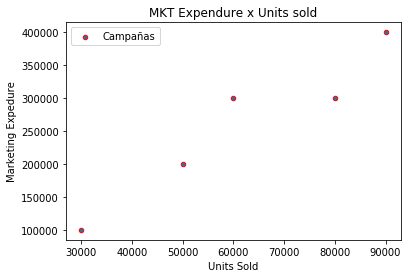

In [34]:
CostoMarketing().print_marketing_expendure(mkt_expendure, units_sold)

### USO DEL MODELO DE REGRESIÓN LINEAL

In [46]:
desired_units_sold = 60000

In [47]:
predict = CostoMarketing().desired_marketing_expendire(
        mkt_expendure,
        units_sold,
        desired_units_sold
    )

### RESULTADO DEL MODELO

In [48]:
f'Unidades que se desean vender {desired_units_sold}'

'Unidades que se desean vender 60000'

In [49]:
f'Gastos de matketing predecido de USD ${str(round(predict[0],0))}'

'Gastos de matketing predecido de USD $250877.0'

[238461.53846154 207142.85714286 373076.92307692 364000.
 140000.        ]


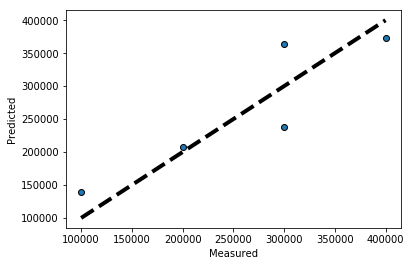

In [26]:
CostoMarketing().predicturePrint(mkt_expendure, units_sold)

# Ejercicio Nº3

¿Qué línea de productos registró el mayor incremento absoluto en los ingresos (cantidad en dólares, no porcentaje) en la segunda mitad del año en comparación con la primera mitad del año?

| LINEA DE PRODUCTO |     Q1   |     Q2    |     Q3    |     Q4    |
|:-----------------:|:--------:|:---------:|:---------:|:---------:|
|                 C#|    26.000|     27.000|     33.000|     15.000|
|         JavaScript|    20.000|     25.000|     30.000|     18.000|
|           HTML/CSS|     1.000|      5.000|      7.000|      1.000|   
|                PHP|    12.000|     11.000|     14.000|     13.000|
|               Ruby|     4.000|      4.000|      5.000|      6.000|



# ESTRATEGIA

para facilitar la visualización de los datos provenientes enunciado para trabajarlos en un DataFrame de pandas que permite manipular los datos de forma rápida e intuitiva.

In [52]:
import pandas as pd

In [53]:
ventas = {
    "C#": [26000, 26000, 26000, 26000,],
    "Javascript": [20000, 25000 , 30000, 18000],
    "HTML/CSS": [1000, 5000, 7000, 1000],
    "PHP": [12000, 11000, 14000, 13000],
    "Ruby": [4000, 4000, 5000, 6000]
    }

In [54]:
df_trimestre = pd.DataFrame.from_dict(ventas, orient='index', columns=['Q1', 'Q2', 'Q3', 'Q4'])

Se declara una segunda variable inicializada como un DataFrame vacío para migrar las conversiones de __Trimestres a Semestres__

In [55]:
df_semestre = pd.DataFrame()

In [56]:
df_semestre['S1'] = df_trimestre['Q1'] + df_trimestre['Q2']
df_semestre['S2'] = df_trimestre['Q3'] + df_trimestre['Q4']

### Visualización de los datos en Trimestres

In [57]:
df_trimestre
# data a partir de datos del enunciado

Q1     Q2     Q3     Q4
C#          26000  26000  26000  26000
Javascript  20000  25000  30000  18000
HTML/CSS     1000   5000   7000   1000
PHP         12000  11000  14000  13000
Ruby         4000   4000   5000   6000

### Visualización de los datos en Semestres

In [58]:
df_semestre

S1     S2
C#          52000  52000
Javascript  45000  48000
HTML/CSS     6000   8000
PHP         23000  27000
Ruby         8000  11000

## Calculos

In [59]:
df_semestre['var_USD'] = df_semestre.S2 - df_semestre.S1
df_semestre['var_porc'] = round(((df_semestre.S2/ df_semestre.S1) - 1) * 100, 0)

In [60]:
df_semestre

S1     S2  var_USD  var_porc
C#          52000  52000        0       0.0
Javascript  45000  48000     3000       7.0
HTML/CSS     6000   8000     2000      33.0
PHP         23000  27000     4000      17.0
Ruby         8000  11000     3000      38.0

# CONCLUSIÓN

Cómo se puede Observar el mayor incremento absoluto en los ingresos fue en __PHP__ dentro de la linea de productos.

Con un ingreso de $4,000 USD y una variación del 17\%, aunque por otra parte, dentro de la linea de productos el __Ruby__ tuvo la mayor variación porcentual de ingresos, con un 38\% 

In [61]:
df_semestre[df_semestre.var_USD == max(df_semestre.var_USD) ]

S1     S2  var_USD  var_porc
PHP  23000  27000     4000      17.0